In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.neural_network import MLPClassifier

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
print('Training size', len(train))
print('Testing size', len(test))

Training size 6000
Testing size 1000


In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
class_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 
           3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 
           7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

/tmp/nix-shell.eoeHva/ipykernel_514/705585911.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, ind+1)


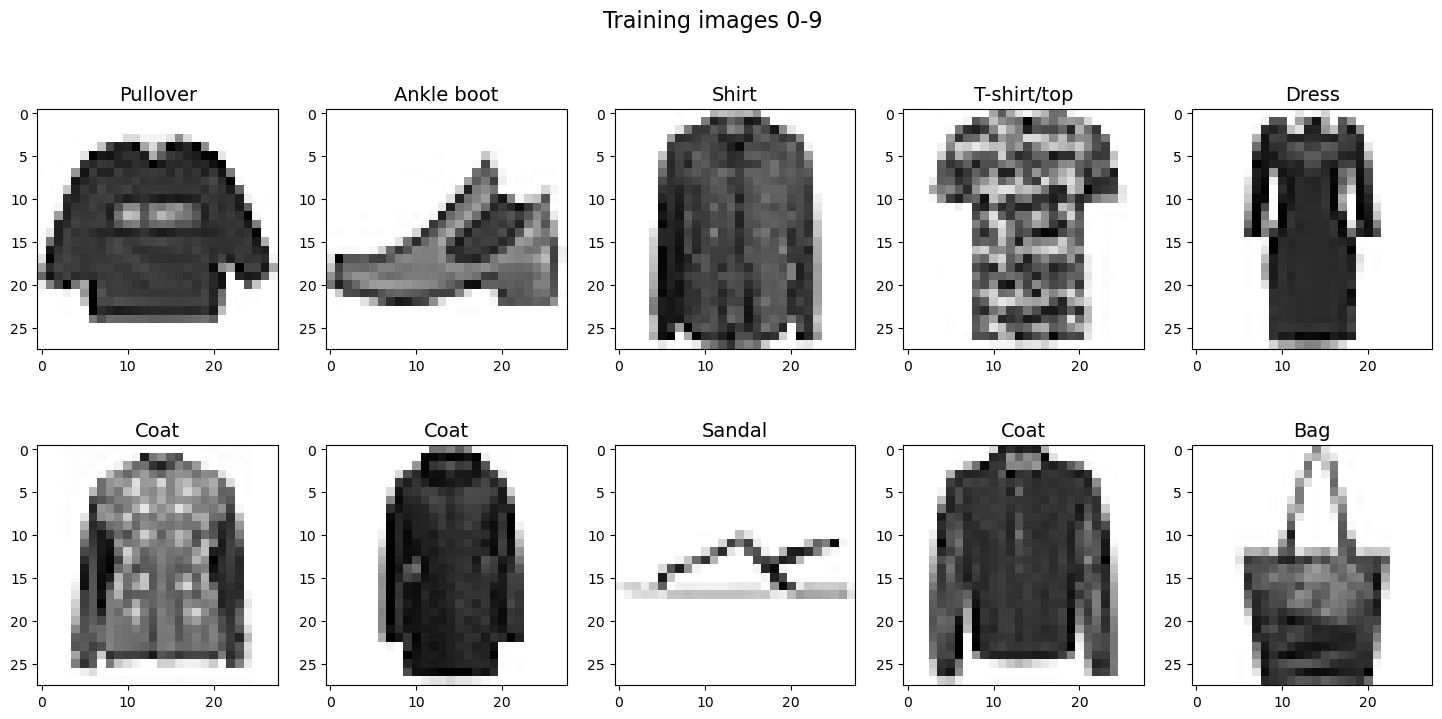

In [6]:
# Plot the first 10 training images with class labels
fig, ax = plt.subplots(figsize=(18, 8))

for ind, row in train.iloc[:10, :].iterrows():
    plt.subplot(2, 5, ind+1)
    plt.title(class_labels[row[0]], fontsize=14)
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Training images 0-9', fontsize=16)
    plt.imshow(img, cmap='Greys')

In [7]:
Xtrain = train
Xtrain = Xtrain.drop(['label'], axis=1)
ytrain = train['label']

In [8]:
mlpModel = MLPClassifier(random_state=123)
mlpModel.fit(Xtrain, ytrain)

MLPClassifier(random_state=123)

In [9]:
# Score on training data
print('Score:', mlpModel.score(Xtrain, ytrain))

Score: 0.9593333333333334


In [10]:
# Neural network structure
print('Number of total layers:', mlpModel.n_layers_)
print('Number of hidden layers:', mlpModel.n_layers_ - 2)
print('Number of outputs:' , mlpModel.n_outputs_)

Number of total layers: 3
Number of hidden layers: 1
Number of outputs: 10


In [11]:
# Predicted classes and probabilities
print('Class predictions:', mlpModel.predict(Xtrain[0:5]))
print('Class probabilities:', mlpModel.predict_proba(Xtrain[0:5]))

Class predictions: [2 9 6 0 3]
Class probabilities: [[8.47903450e-004 1.79158128e-021 8.94316044e-001 2.54294350e-010
  3.81897979e-003 4.95336886e-019 1.01017073e-001 2.16429012e-078
  6.01473724e-011 2.03623030e-071]
 [5.03224863e-075 2.55272127e-037 2.77489987e-102 5.08992290e-084
  7.57581867e-069 2.12915864e-017 2.19953070e-070 1.52332168e-009
  4.16929312e-071 9.99999998e-001]
 [1.48329143e-007 1.15165401e-023 1.65464144e-004 1.44327267e-010
  1.54198497e-004 1.47327511e-026 9.99680189e-001 5.66438628e-089
  1.37626202e-027 1.09013994e-067]
 [9.99999780e-001 8.06507571e-031 1.09703271e-010 5.78262689e-011
  2.92403234e-021 6.12282951e-035 2.19864850e-007 6.47829043e-066
  3.12270829e-043 1.73120946e-071]
 [4.08735930e-011 1.48465153e-025 1.69940924e-009 9.99999922e-001
  2.56553472e-012 1.43353927e-036 7.62803054e-008 9.20207512e-070
  1.26497103e-036 6.43412549e-062]]


In [12]:
Xtest = test
Xtest = Xtest.drop(['label'], axis=1)
ytest = test['label']

# Score on testing data
mlpModel.score(Xtest, ytest)

0.951

In [13]:
ypred = mlpModel.predict(Xtest)
misclassified = [i for i in range(len(ytest)) if ypred[i] != ytest[i]]

# View first 10 misclassified instances
misclassified[0:10]

[5, 37, 51, 70, 81, 89, 110, 125, 187, 208]

Actual class Coat


Text(0.5, 1.0, 'Pullover')

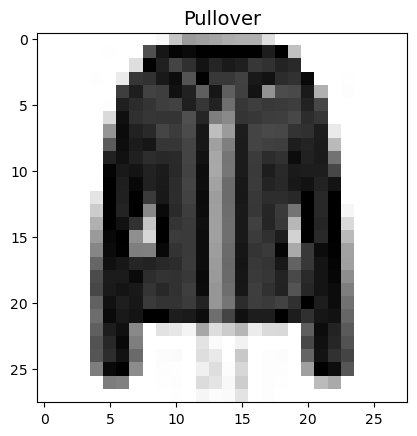

In [14]:
# Plot misclassified instances
instance = 37
print('Actual class', class_labels[ytest[instance]])

img = Xtest.iloc[instance].to_numpy().reshape(28, 28)
plt.imshow(img, cmap='Greys')
plt.title(class_labels[ypred[instance]], fontsize=14)

In [15]:
# Display confusion matrix
metrics.confusion_matrix(ytest, ypred)

array([[104,   0,   0,   1,   0,   0,   3,   0,   0,   0],
       [  0,  89,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,  82,   1,   5,   0,  10,   0,   0,   0],
       [  0,   0,   0, 108,   1,   0,   3,   0,   0,   0],
       [  0,   0,   8,   1,  98,   0,   7,   0,   0,   0],
       [  0,   0,   0,   0,   0,  82,   0,   1,   0,   0],
       [  2,   0,   1,   0,   2,   0, 101,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 101,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  96,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,  90]])